<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Кирилл, доброго дня! рад приветствовать тебя вновь) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК, данные на базе)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [6]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Рассчитаем ожидаемую эффективность обогащения золота по следующей формуле:
    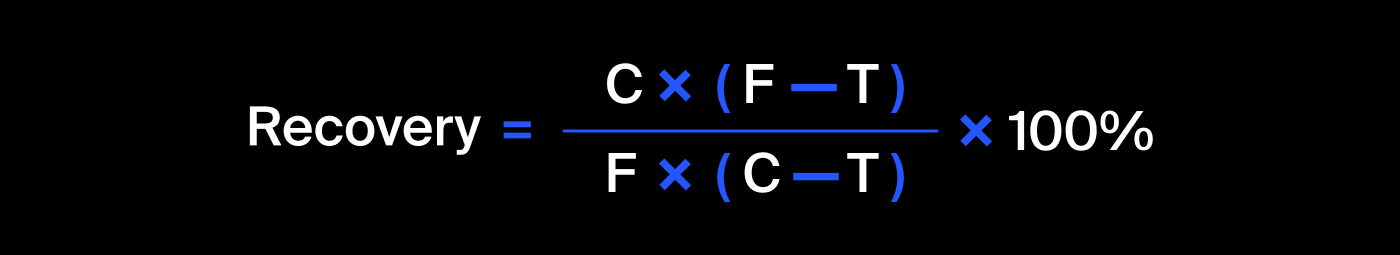
    
    где:
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.  
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [9]:
C = data_train['rougher.output.concentrate_au'] 
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery_pred = ((C*(F-T))/(F*(C-T)))*100
recovery_pred

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

Определим Среднюю абсолютную ошибку между планируемым значением эффективности обогащения золота и реальными значениям по столбцу rougher.output.recovery.

In [10]:
MAE = mean_absolute_error(data_train['rougher.output.recovery'], recovery_pred)
MAE

9.682896147825551e-15

Как видим значение MAE очень мало, это говорит о том, что представленная в данных эффективность обогащения рассчитана верно.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>отлично, есть контакт)

In [11]:
data_train.duplicated().sum(), \
data_test.duplicated().sum()

(0, 0)

Дубликаты в данных отсутствуют.

Преобразуем столбцы с датами из object в правильный формат.

In [12]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

Нам известно, что данные соседних по времени параметров часто похожи. Обработаем имеющиеся в данных пропуски, используя метод ffill.

In [13]:
data_train.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.state.floatbank10_e_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
rougher.output.concentrate_pb                  0
date                                           0
Length: 87, dtype: int64

In [14]:
data_test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank6_a_level     0
rougher.input.floatbank10_xanthate             0
rougher.input.feed_au                          0
rougher.input.feed_pb                          0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.state.floatbank10_a_level              0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.stat

In [15]:
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК! Метод ffill или интерполяция - часто помогают в подобных проектах. Но нужно ещё иметь ввиду такой момент: у нас могут наблюдаться большие периоды с пропуском. И тогда данная подстановка не всегда будет адекватной. В этом случае, может быть, и удалить придётся..

In [16]:
data_train.isna().sum().sum(), \
data_test.isna().sum().sum()

(0, 0)

Сравнив между собой признаки обучающей и тестовой выборки, можно заметить, что в тестовую выборку не попали признаки с параметрами продукта (output) по каждому этапу и признаки финальной характеристики - столбцы final.  


В тестовой выборке отсутствуют целевые признаки, добавим их из полной выборки.

In [17]:
#data_test = pd.merge(data_test, data_full[['rougher.output.recovery','final.output.recovery']], left_index=True, right_index=True, how='left')
#data_test.head()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>хорошо.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

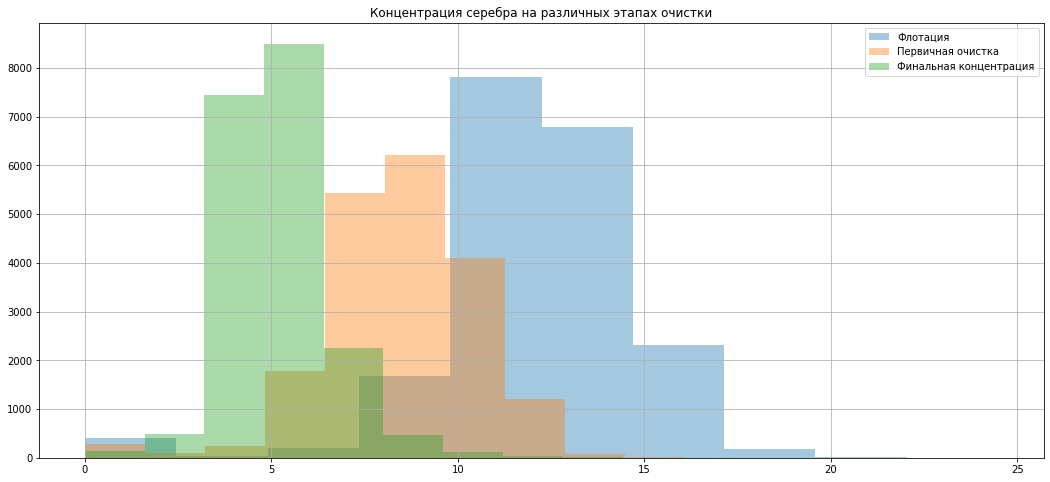

In [18]:
fig, ax = plt.subplots(figsize=(18,8))
data_full['rougher.output.concentrate_ag'].hist(alpha=0.4)
data_full['primary_cleaner.output.concentrate_ag'].hist(alpha=0.4)
data_full['final.output.concentrate_ag'].hist(alpha=0.4)
plt.legend(labels=['Флотация','Первичная очистка', 'Финальная концентрация'])
plt.title("Концентрация серебра на различных этапах очистки")
plt.show()

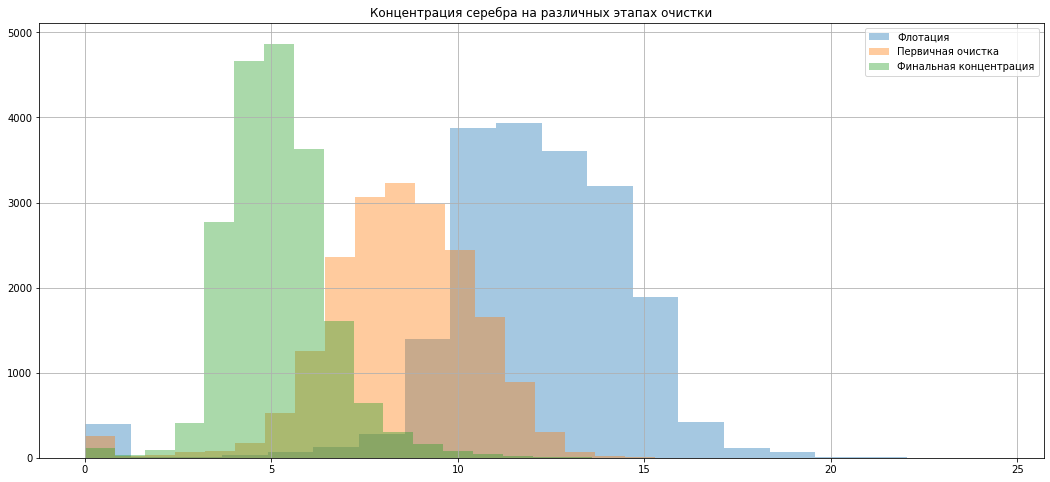

In [19]:
fig, ax = plt.subplots(figsize=(18,8))
data_full['rougher.output.concentrate_ag'].hist(bins = 20,alpha=0.4)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins = 20,alpha=0.4)
data_full['final.output.concentrate_ag'].hist(bins = 20,alpha=0.4)
plt.legend(labels=['Флотация','Первичная очистка', 'Финальная концентрация'])
plt.title("Концентрация серебра на различных этапах очистки")
plt.show()

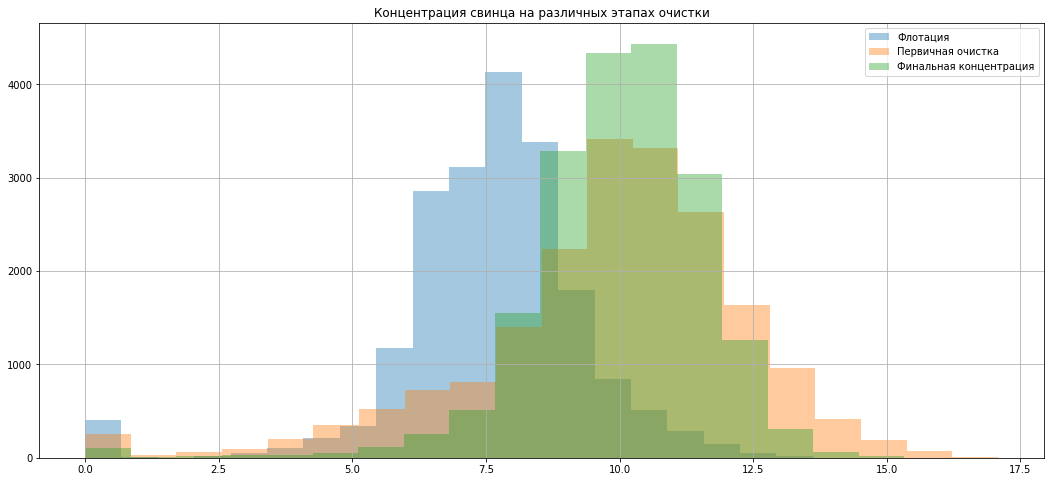

In [20]:
fig, ax = plt.subplots(figsize=(18,8))
data_full['rougher.output.concentrate_pb'].hist(bins = 20,alpha=0.4)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins = 20,alpha=0.4)
data_full['final.output.concentrate_pb'].hist(bins = 20,alpha=0.4)
plt.legend(labels=['Флотация','Первичная очистка', 'Финальная концентрация'])
plt.title("Концентрация свинца на различных этапах очистки")
plt.show()

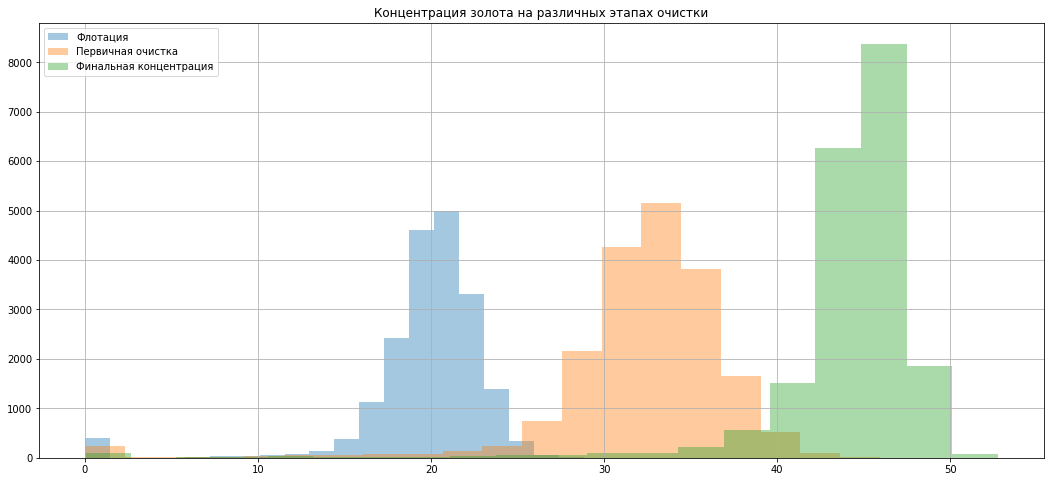

In [21]:
fig, ax = plt.subplots(figsize=(18,8))
data_full['rougher.output.concentrate_au'].hist(bins = 20,alpha=0.4)
data_full['primary_cleaner.output.concentrate_au'].hist(bins = 20,alpha=0.4)
data_full['final.output.concentrate_au'].hist(bins = 20,alpha=0.4)
plt.legend(labels=['Флотация','Первичная очистка', 'Финальная концентрация'])
plt.title("Концентрация золота на различных этапах очистки")
plt.show()

Как и предполагалось, с каждым этапом очистки концетрация золота в сырье растёт, что говорит об эффективности технологического процесса.   
Обратная ситуация наблюдается для серебра: после флотации концентрация серебра самая большая, дальнейшая очистка приводит к понижению доли серебра. Основной целью бизнеса является добыча золота, но не стоит забывать, что прочие металлы также приносят дополнительный доход для бизнеса. В рассматриваемом процессе флотация - наиболее эффективный этап для "поиска" серебра.  
Для свинца ситуация схожа с золотом: после флотации средняя концентрация свинца растёт, но уже после первичной очистки доля свинца существенно не меняется.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
КЛАССНО, удобный графический анализ. И видно, что золотишко растёт - и это хорошо, кому-то). Серебро падает - это логично, мы же производим золоот)<br>
А свинец - побочное дитя химических реакций, поэтому не много увеличивается его содержание)

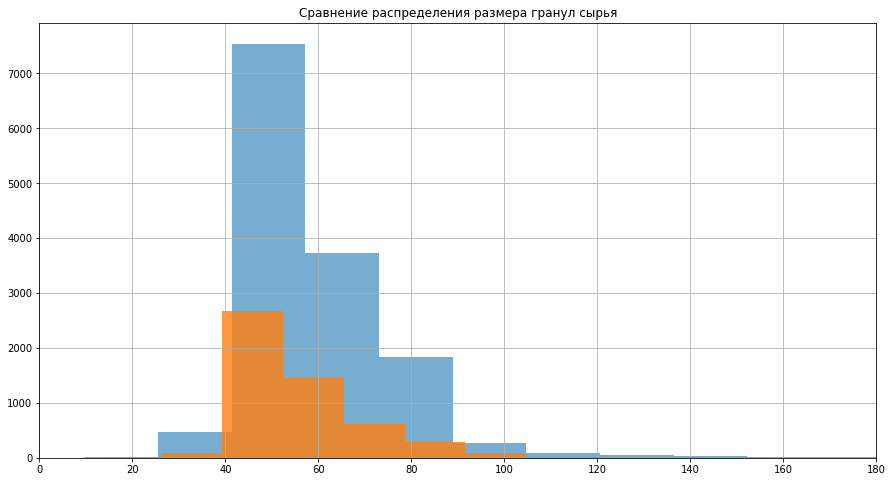

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
data_train['rougher.input.feed_size'].hist(bins = 30, alpha=0.6)
data_test['rougher.input.feed_size'].hist(bins = 30, alpha=0.8)
plt.xlim(0,180)
plt.title("Сравнение распределения размера гранул сырья")
plt.show()

В целом распределение размеров гранул сырья в обучающей и тестовой выборках схожи. Тестовая выборка характеризуется наличием небольшого числа гранул очень маленького размера.

In [23]:
data_train['rougher.input.feed_size'].median(), \
data_test['rougher.input.feed_size'].median()

(55.269783890501536, 50.8468431600362)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК,  верно, распределение для тестовой выборки немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале  40—100 мкм  («Флотация руды»: ООО "Техноаналитприбор":[сайт].URL:https://techade.ru/stati/flotatsiya-rudy) для обоих выборок. Поэтому, да, выборки подходят для оценки.

Сравним суммарную концентрацию всех вещест на разных стадиях очистки сырья.

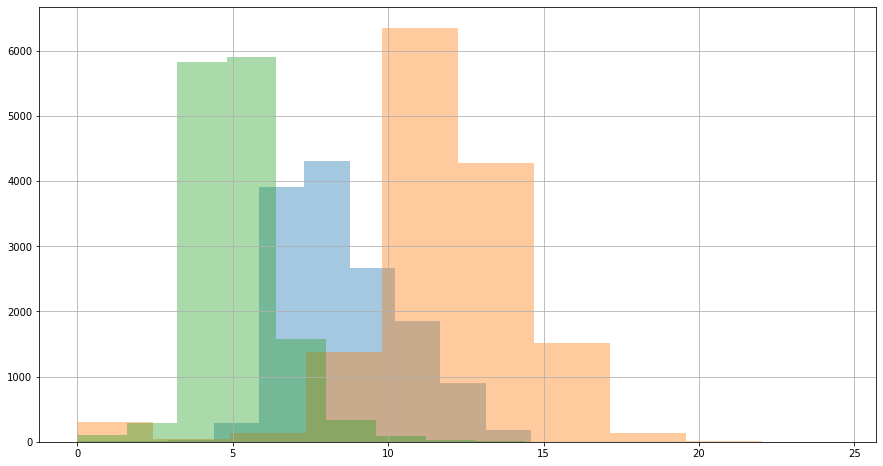

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

# Концентрация веществ  в сырье
data_train['rougher_feed'] = data_train['rougher.input.feed_ag']
+data_train['rougher.input.feed_pb']+data_train['rougher.input.feed_sol']
+data_train['rougher.input.feed_au']
data_train['rougher_feed'].hist(alpha=0.4)

# В черновом концентрате
data_train['rougher_output'] = data_train['rougher.output.concentrate_ag']
+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_sol']
+data_train['rougher.output.concentrate_au']
data_train['rougher_output'].hist(alpha=0.4)

#В финальном концентрате
data_train['final_output'] = data_train['final.output.concentrate_ag']
+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_sol']
+data_train['final.output.concentrate_au']
data_train['final_output'].hist(alpha=0.4)
plt.show()


Как видим на черновом и финальном этапах появляется аномалия - ряд продуктов имеет суммарную концентрацию веществ равную 0. При этом в исходном сырье нулевые значения отсутствовали. Удалим пустые значения. 

In [25]:
null_concentration = data_train.query('final_output == 0 | rougher_output == 0')
data_train.drop(null_concentration.index, inplace=True)
data_train.shape

(13795, 90)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК. Ещё пару строк по выбросам: в некоторых проектах - это важно, избавиться от выбросов<br>

И вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии в суммарных концентрациях - и их надо "убить". Дело в том, что предполагается, что хоть грамм чего-нибудь но есть в руде. А если мы имеем ноль, значит большая вероятность неточности измерений.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов с помощью графика "ящик с усами", то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

## Модель

Напишем функцию расчета итоговой метрики - final_sMAPE.

In [26]:
#функция вычисления метрики sMAPE
def sMAPE(target, predicted):
    sMAPE = 1 / len(target) * sum(abs(target - predicted) / ((abs(target) + abs(predicted)) / 2)) * 100
    return sMAPE

#функция вычисления итоговой метрики
def final_sMAPE(sMAPE_rough, sMAPE_final):
    result = 0.25 * sMAPE_rough + 0.75 * sMAPE_final
    return result

In [27]:
data_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [28]:
#Признаками для модели являются входные данные при флотации
rough_columns = ['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']

features_rougher_train =data_train[rough_columns]

target_rougher_train = data_train['rougher.output.recovery']

features_rougher_test = data_test[rough_columns]
#target_rougher_test = data_test['rougher.output.recovery']
target_rougher_test = data_full[data_full['date'].isin(data_test['date'].values)]['rougher.output.recovery'] 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
понятно

In [29]:
model = LinearRegression()
model.fit(features_rougher_train, target_rougher_train)
predictions_test = model.predict(features_rougher_test)
sMAPE_rough = sMAPE(target_rougher_test, predictions_test)
sMAPE_rough

8.188480264713807

In [30]:
score = make_scorer(sMAPE, greater_is_better=False)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
своя функция - дело верное)

In [31]:
clf = RandomForestRegressor()

param_dict = {
    "max_depth":range(1,20,2),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,10)}
grid = GridSearchCV(clf, param_grid=param_dict, verbose=1, n_jobs=-1, cv = 3, scoring = score)
grid.fit(features_rougher_train, target_rougher_train)

grid.best_estimator_, \
grid.best_score_

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 42.4min finished


(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
 -7.259220374874687)

In [42]:
model = RandomForestRegressor(max_depth = 3, min_samples_leaf = 4, min_samples_split = 6, random_state = 1)
model.fit(features_rougher_train, target_rougher_train)
predictions_test_2 = model.predict(features_rougher_test)
sMAPE_rough_2 = sMAPE(target_rougher_test, predictions_test_2)
sMAPE_rough_2

8.735881008664347

In [33]:
columns_final = ['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']
features_final_train = data_train[columns_final]
target_final_train = data_train['final.output.recovery']
features_final_test = data_test[columns_final]
#target_final_test = data_test['final.output.recovery']
target_final_test = data_full[data_full['date'].isin(data_test['date'].values)]['final.output.recovery'] 

In [34]:
model = LinearRegression()
model.fit(features_final_train, target_final_train)
predictions_test_final = model.predict(features_final_test)
sMAPE_final = sMAPE(target_final_test, predictions_test_final)
sMAPE_final

10.20563190733058

In [35]:
clf = RandomForestRegressor()

param_dict = {
    "max_depth":range(1,20,2),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,10)}
grid = GridSearchCV(clf, param_grid=param_dict, verbose=1, n_jobs=-1, cv = 3, scoring = score)
grid.fit(features_final_train, target_final_train)


grid.best_estimator_, \
grid.best_score_

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 56.5min finished


(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
 -10.258927354032656)

In [43]:
model = RandomForestRegressor(max_depth=1,min_samples_leaf=6,min_samples_split=5,random_state=1)
model.fit(features_final_train, target_final_train)
predictions_test_final_2 = model.predict(features_final_test)
sMAPE_final_2 = sMAPE(target_final_test, predictions_test_final_2)
sMAPE_final_2

9.263603030810213

In [45]:
# минимальное значение sMAPE final на обучающей выборке.
final_sMAPE_train= 0.25*7.259220374874687+0.75*10.258927354032656
final_sMAPE_train

9.509000609243163

In [44]:
final_sMAPE(sMAPE_rough, sMAPE_final_2)

8.994822339286111

Мы подготовили прототип модели, которая предсказывает коэффициент восстановления золота из золотосодержащей руды. Для решения задачи мы ввели новую метрику — sMAPE («симметричное среднее абсолютное процентное отклонение»). По результату валиадции модели на тестовой выборки получили значение скорректированной метрики итоговое_sMAPE - 8.99. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Кирилл, интересную работу ты провёл.<br>
Понятно, логично, вдумчиво<br>
Видна хорошая предвариателная работа с данными, уместный графический анализ, осмысленная аналитика и дельная модельная работа - многое удалось как надо)<br>
    
Заказчик не зря дал тест и трайн выборки. Т.к. планировал проверять модель именно на тесет. Тем самым, мы должны были обучать только на тех фактрах, что есть в тесте. Ты пошёл чуть иным путём - создал спсиок факторов. Тоже вараинт.<br>
<br><font color='red'><br>
Надо только проверить не добавились ли в тест те, что изначально там не были.<font color='green'><br>
    
Метрика - достаточно низкая. И это хорошо.<br>
вот только не понятно насколько))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
Например, в формулу метрики предиктом подставить медианные значения таргет-трайна). <br>
Или использовать DummyRegression (например, как ниже))<br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(X_train, y_train_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(X_test)
smape_dummy_rougher = smape(y_test_rougher, dummy_rougher_pred)
print(smape_dummy_rougher)

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
Привет, спасибо за комментарии!  
    
Признаки брал из столбцов, которые изначально были в тесте, было лень дропать ненужные :) Для rough взял признаки, которые есть только на этапе флотации, для финальной - все остальные этапы, кроме флотации. 
    
Проверил на адекватность: дамми-модель работает лучше. Вот не могу понять почему так вышло. У коллег метрики значительно ниже получились (примерно как у меня на трейне). Даже проверил кэтбустом без настройки гиперпараметров, он ещё хуже результат выдаёт.
    
Upd: Как я и думал дело оказалось в таргетах, как-то неправильно добавил столбцы в тестовую выборку, пришлось переделывать.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Привет, Кирилл. Тут с коллегами - сложно сравнивать. Т.к. Результат модели зависит от: как обрабатывались аномалии и пропуски, какие факторы брались, как с выбросами делеали, какие настройки моедлей..... И тут скажу, что ооооочень сложно найти две одинаковые работы. (если такие будут - возникнет вопрос:).<br>

Поэтому, скажу, что с метрикой константной модели и твоей моделью - ОК. Но действительно видно, что разница средних метрик - совсем не большая. Но тут сложно говорить кто лучше/хуже ...По идее, если хотим точно выяснить - надо испрользовать проверку гипотез мз спринта 4, т.е. сраниваем средние с учётом разброса данных)
Такой "разбег" метрик - допустимо в этом проекте). Что же тогда ещё для дальнейшего улучшения качества моделирования возможно сделать?<br> 
    
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))<br><br>

Спасибо за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
Возник ворос: раз мы строим несколько моделей для двух таргетов, можно для подсчета итоговой метрики использовать разные модели? Как в моём случае: при флотации лучший результат показывает линейная регрессия, а на финальном этапе - случайный лес, или обязательно использовать одинаковые модели для расчета?    

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>
Разные модели - можно. Тут нас никто и ни что не ограничивает. Согласен с идеей).

Осуществим проверку модели на адекватность, создадим дамми-признаки, которые для обучения всегда подставляют медианные значения.

In [46]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_rougher_train, target_rougher_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_rougher_test)
sMAPE_rougher_dum = sMAPE(target_rougher_test, dummy_rougher_pred)
sMAPE_rougher_dum

8.525870329335161

In [47]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_final_train, target_final_train)
dummy_final_pred = dummy_regressor_final.predict(features_final_test)
sMAPE_final_dum = sMAPE(target_final_test, dummy_final_pred)
sMAPE_final_dum

9.743369308411774

In [48]:
dummy_sMAPE = final_sMAPE(sMAPE_rougher_dum, sMAPE_final_dum)
dummy_sMAPE

9.438994563642622

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке